# Training

### Initialize environment
- Download NLTK data

In [1]:
from src.utils import check_nltk_data

check_nltk_data()

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### Load & prepare data

In [2]:
import pandas
import os


df = pandas.DataFrame()

for root, dirs, files in os.walk('./data/'):
    for file in files:
        print(f"checking: {file}")
        if file.lower().endswith(".csv") and file.lower() != "dataset.csv":
            filepath = os.path.join(root, file)
            tmp_df = pandas.read_csv(filepath)
            print(f"{filepath}: {tmp_df.shape}")
            df = pandas.concat([df, tmp_df], ignore_index=True)

df.to_csv("./data/dataset.csv", index=None)

df.shape

checking: dataset.csv
checking: dataset.testing.csv
./data/dataset.testing.csv: (9471, 2)
checking: dataset.training.csv
./data/dataset.training.csv: (37881, 2)
checking: go-back.csv
./data/navigation/go-back.csv: (684, 2)
checking: scroll-up.csv
./data/navigation/scroll-up.csv: (430, 2)
checking: go-to.csv
./data/navigation/go-to.csv: (752, 2)
checking: scroll-down.csv
./data/navigation/scroll-down.csv: (414, 2)
checking: help.csv
./data/meta/help.csv: (702, 2)
checking: noop.csv
./data/meta/noop.csv: (240, 2)
checking: explain.csv
./data/meta/explain.csv: (827, 2)
checking: cancel.csv
./data/meta/cancel.csv: (842, 2)
checking: confirm.csv
./data/meta/confirm.csv: (844, 2)
checking: repeat.csv
./data/meta/repeat.csv: (742, 2)
checking: undo.csv
./data/meta/undo.csv: (910, 2)
checking: redo.csv
./data/meta/redo.csv: (673, 2)
checking: search.csv
./data/forms/search.csv: (200, 2)
checking: submit-form.csv
./data/forms/submit-form.csv: (240, 2)
checking: fill-field.csv
./data/forms/fill-

(59190, 2)

In [3]:
df['label'].unique()

array(['PREVIOUS_ITEM', 'EXPLAIN', 'VIEW_ITEM', 'CANCEL', 'GO_BACK',
       'REDO', 'HELP', 'GO_TO', 'SCROLL_UP', 'SELECT_ITEM', 'UNDO',
       'SCROLL_DOWN', 'NOOP', 'REPEAT', 'NEXT_ITEM', 'SUBMIT_FORM',
       'CONFIRM', 'FILL_FIELD', 'SEARCH', 'CLEAR_FIELD'], dtype=object)

In [4]:
df[df.isnull().any(axis=1)]

,text,label


### Class distribution

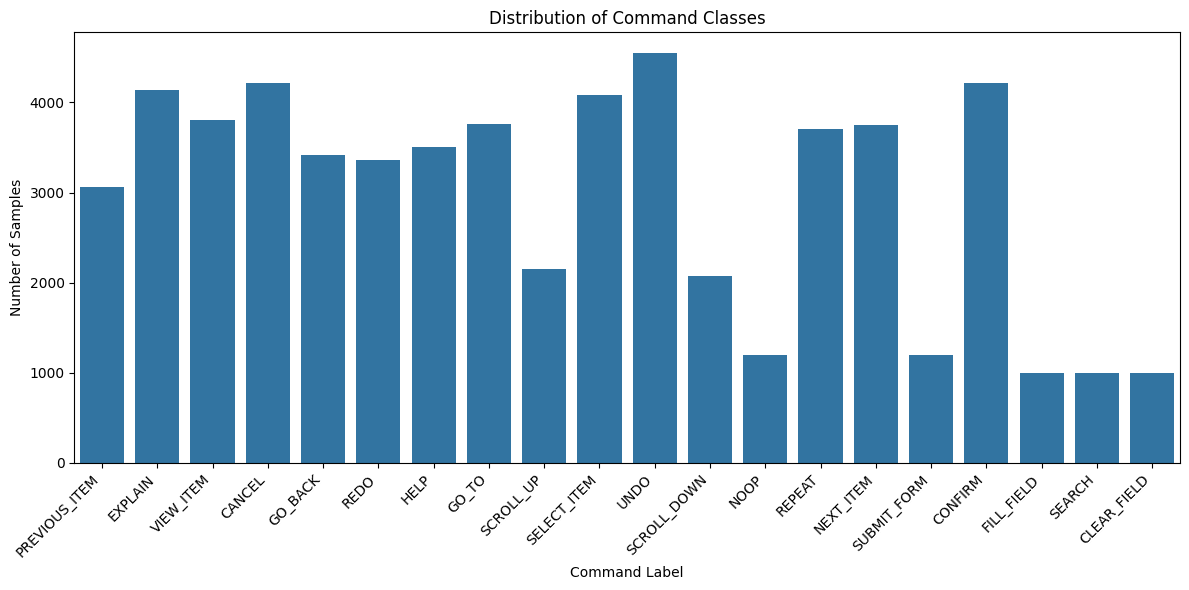

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='label')
plt.title('Distribution of Command Classes')
plt.xlabel('Command Label')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [6]:
print("Value counts per label:")
df['label'].value_counts()

Value counts per label:


label
UNDO             4550
CONFIRM          4220
CANCEL           4210
EXPLAIN          4135
SELECT_ITEM      4080
VIEW_ITEM        3800
GO_TO            3760
NEXT_ITEM        3750
REPEAT           3710
HELP             3510
GO_BACK          3420
REDO             3365
PREVIOUS_ITEM    3060
SCROLL_UP        2150
SCROLL_DOWN      2070
NOOP             1200
SUBMIT_FORM      1200
FILL_FIELD       1000
SEARCH           1000
CLEAR_FIELD      1000
Name: count, dtype: int64

### Preprocess data

In [7]:
from src.preprocess import clean_text

df['cleaned_text'] = df['text'].apply(clean_text)

df.head()

,text,label,cleaned_text
0,highlight previous item,PREVIOUS_ITEM,highlight previous item
1,help know mean,EXPLAIN,help know mean
2,show report info,VIEW_ITEM,show report info
3,cancel stop process,CANCEL,cancel stop process
4,go last view,GO_BACK,go last view


### Analyze processed data

In [8]:
from collections import Counter

# overall most common words
all_words = ' '.join(df['cleaned_text']).split()
common_words = Counter(all_words).most_common(20)

common_words

[('redo', 4375),
 ('scroll', 4350),
 ('next', 3720),
 ('undo', 3400),
 ('go', 3375),
 ('previous', 3085),
 ('last', 2910),
 ('please', 2785),
 ('show', 2645),
 ('one', 2600),
 ('back', 2545),
 ('confirm', 2545),
 ('item', 2500),
 ('explain', 2330),
 ('help', 2285),
 ('cancel', 2165),
 ('view', 1910),
 ('command', 1755),
 ('record', 1720),
 ('move', 1600)]


Top 10 words for label 'PREVIOUS_ITEM':
[('previous', 1050), ('go', 505), ('earlier', 490), ('item', 475), ('back', 430), ('one', 430), ('older', 430), ('show', 355), ('please', 330), ('move', 255)]


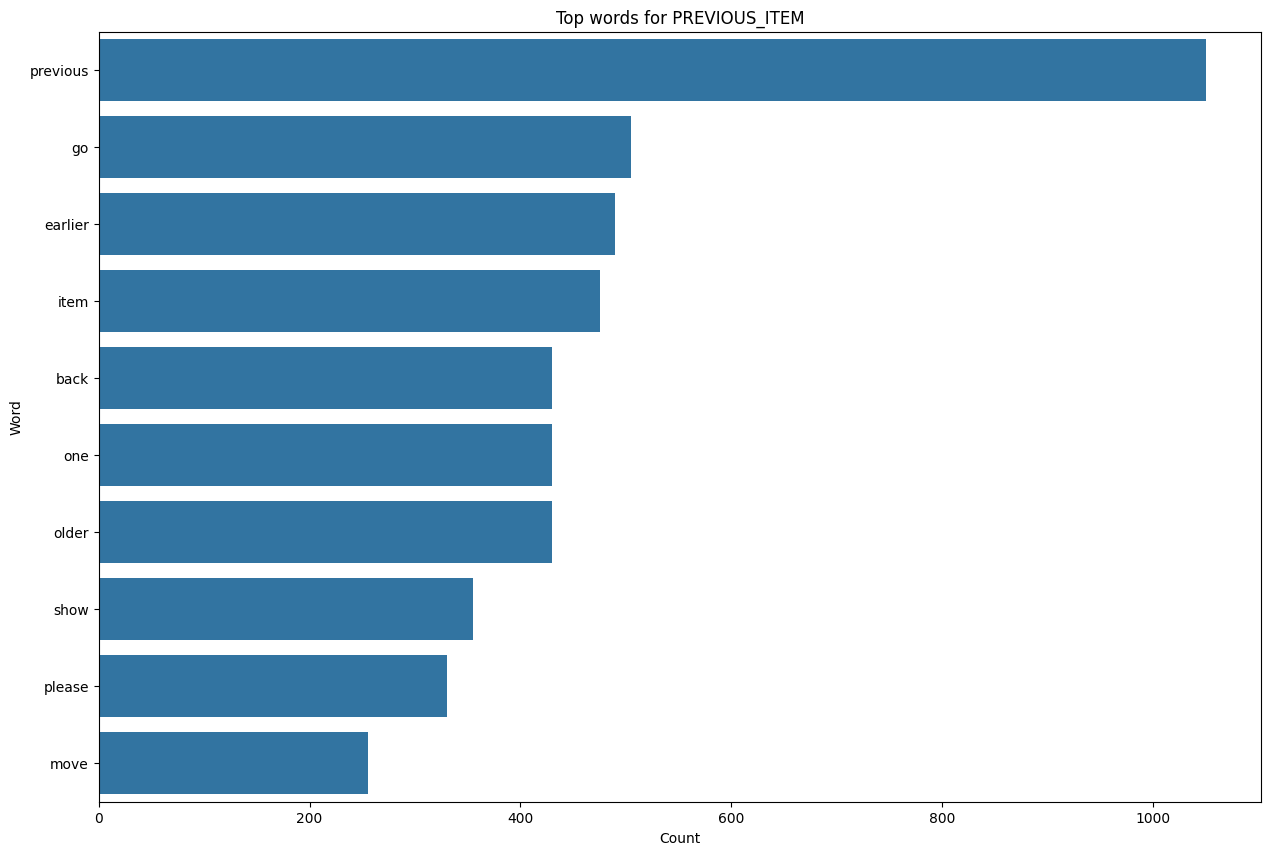


Top 10 words for label 'EXPLAIN':
[('explain', 2260), ('whats', 510), ('tell', 345), ('help', 285), ('command', 215), ('mean', 200), ('function', 160), ('work', 135), ('meaning', 120), ('behind', 115)]


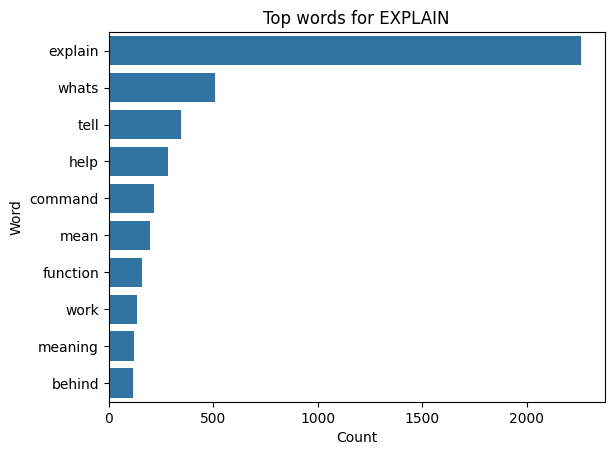


Top 10 words for label 'VIEW_ITEM':
[('detail', 840), ('record', 840), ('info', 745), ('view', 600), ('item', 595), ('display', 590), ('see', 550), ('show', 545), ('open', 525), ('data', 480)]


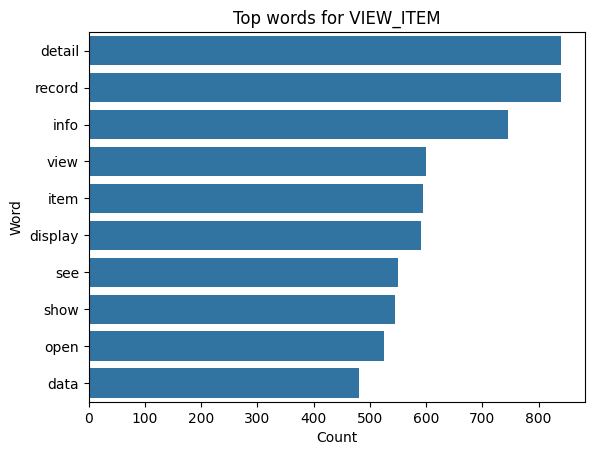


Top 10 words for label 'CANCEL':
[('cancel', 2040), ('stop', 665), ('process', 360), ('current', 355), ('abort', 350), ('please', 315), ('immediately', 285), ('operation', 275), ('right', 265), ('task', 240)]


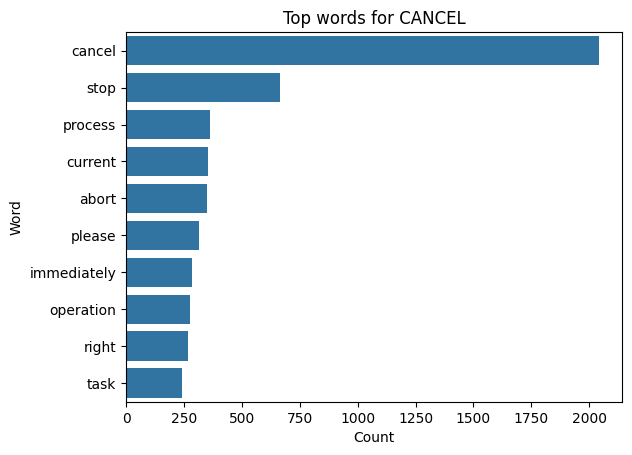

In [9]:
# word frequency per class
plt.figure(figsize=(15, 10))
for i, label in enumerate(df['label'].unique()):
    if i >= 4: break
    subset = df[df['label'] == label]['cleaned_text']
    words_in_class = ' '.join(subset).split()
    common_to_class = Counter(words_in_class).most_common(10)
    print(f"\nTop 10 words for label '{label}':")
    print(common_to_class)

    df_class_words = pandas.DataFrame(common_to_class, columns=['Word', 'Count'])
    sns.barplot(x='Count', y='Word', data=df_class_words)
    plt.title(f'Top words for {label}')
    plt.show()

### Split data

In [10]:
from src.train import split_data

x_train, x_test, y_train, y_test = split_data(x=df['cleaned_text'], y=df['label'], test_size=0.2)

x_train.shape, x_test.shape

((47352,), (11838,))

### Save splits in separate files

In [ ]:
traindf = pandas.DataFrame()
traindf["text"] = x_train
traindf["label"] = y_train
traindf.to_csv('./data/dataset.training.csv', index=None)

testdf = pandas.DataFrame()
testdf["text"] = x_test
testdf["label"] = y_test
testdf.to_csv("./data/dataset.testing.csv", index=None)

### Model selection
Followed scikit-learn's guide on selecting the best estimator: [https://scikit-learn.org/stable/machine_learning_map.html#ml-map](https://scikit-learn.org/stable/machine_learning_map.html#ml-map)

LinearSVC was selected. Training handles hyperparameter tuning.

### Train the model 

In [12]:
from src.train import train_model

pipeline, metrics, y_true, y_pred = train_model("./data/dataset.training.csv", pipeline_path="models/pipeline.joblib")

In [17]:
pipeline

,steps,"[('vectorizer', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


### Training & validation metrics

In [14]:
for k, v in metrics.items():
    print()
    print(k.upper())
    for x, y in v.items():
        print('>', x, y)


TRAINING_DURATION
> start_time 1764071837.8883173
> end_time 1764071839.943285
> duration 2.0549676418304443

TRAINING
> accuracy 0.9328182066635196
> report                precision    recall  f1-score   support

       CANCEL       0.98      0.94      0.96      2863
  CLEAR_FIELD       0.99      0.99      0.99       680
      CONFIRM       0.93      0.96      0.94      2869
      EXPLAIN       0.93      0.94      0.94      2812
   FILL_FIELD       0.96      0.99      0.98       680
      GO_BACK       0.92      0.93      0.92      2325
        GO_TO       0.94      0.95      0.95      2557
         HELP       0.94      0.93      0.93      2387
    NEXT_ITEM       0.97      0.93      0.95      2550
         NOOP       0.71      0.81      0.76       816
PREVIOUS_ITEM       0.90      0.91      0.91      2081
         REDO       0.90      0.91      0.91      2288
       REPEAT       0.90      0.89      0.90      2523
  SCROLL_DOWN       0.79      0.88      0.83      1408
    SCROLL_UP  

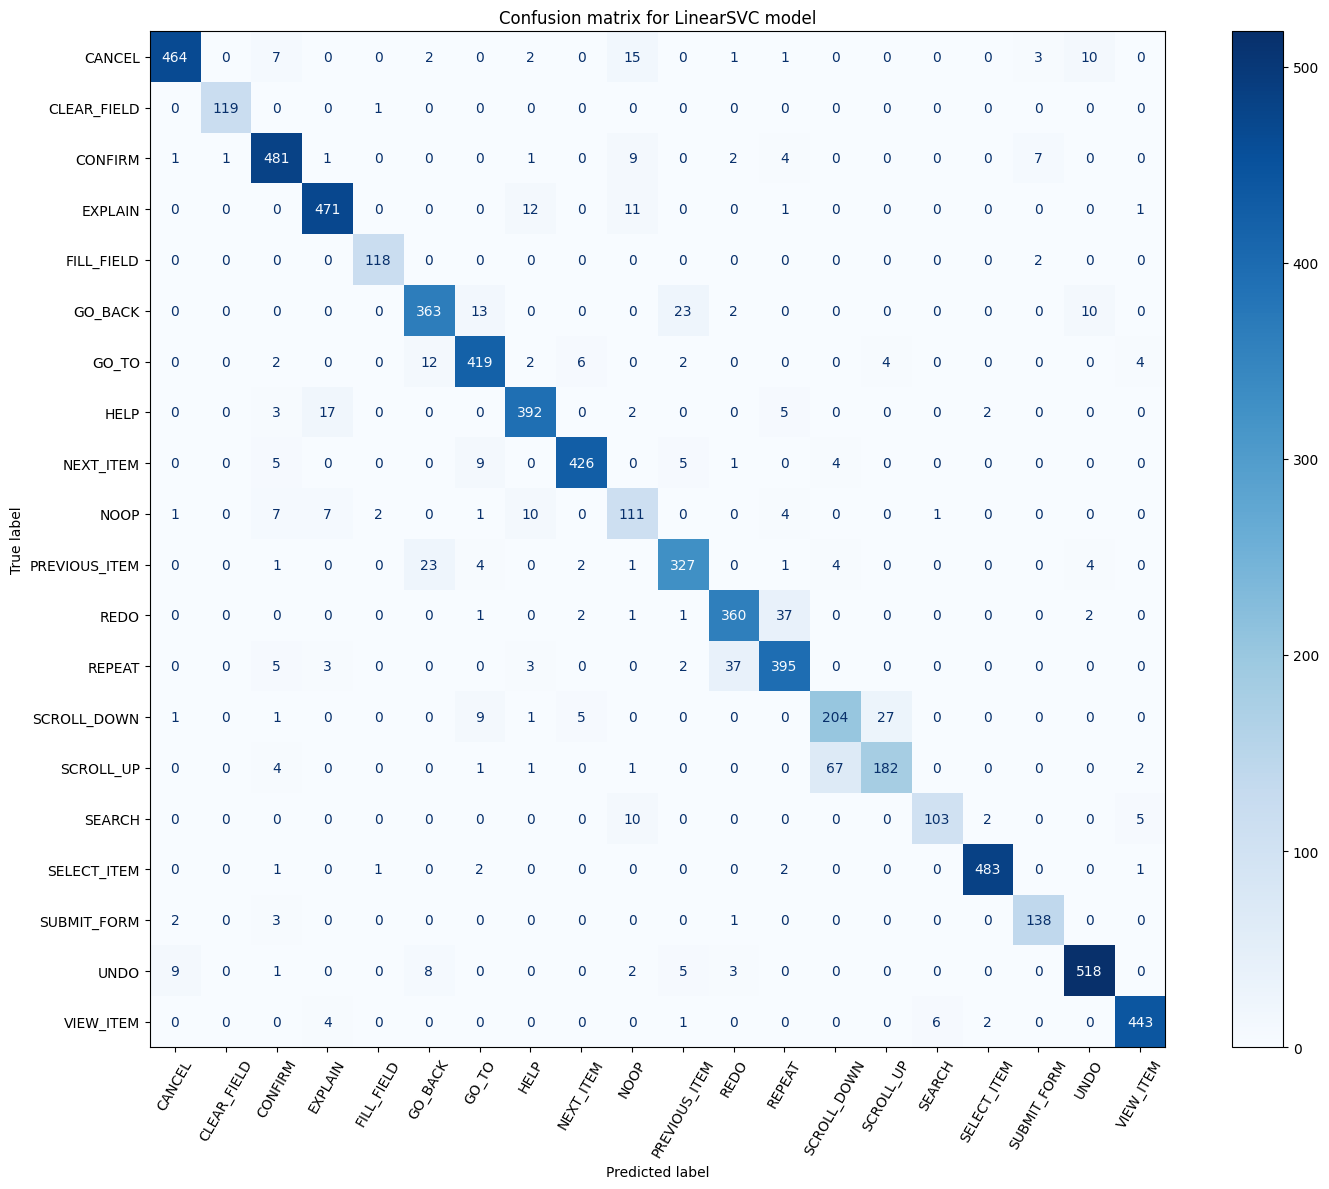

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)

fig, ax = plt.subplots(figsize=(15, 12))
disp.plot(cmap='Blues', ax=ax, xticks_rotation=60) 
ax.set_title('Confusion matrix for LinearSVC model')
plt.tight_layout() 
plt.show()

### Training complete
Checkout `testing.ipynb` to test or learn how to use the trained model.

### Convert joblib model to ONNX

In [18]:
from src.utils import generate_onnx_model

generate_onnx_model("models/pipeline.joblib")

In [ ]:
import joblib
